# HOUSE RATING, Kaggle

### Gonzalo Romero Navarro

#### Load the data and take a look

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv', index_col=0)

In [3]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#### See the label: Sales Price

In [5]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


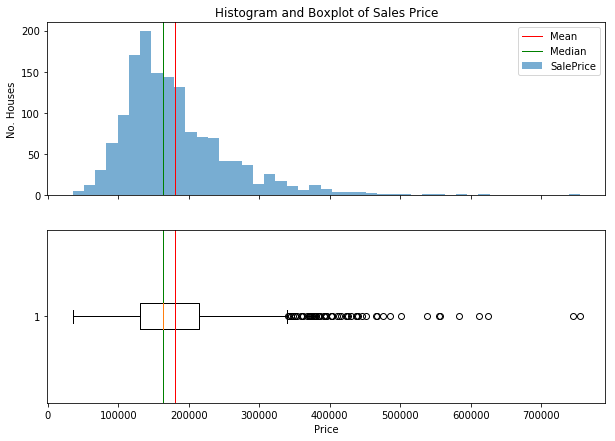

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10,7), sharex=True)

ax[0].hist(train_data['SalePrice'], bins=45, alpha=0.6)
ax[0].axvline(train_data['SalePrice'].mean(), color='r', label="Mean", linewidth=1)
ax[0].axvline(train_data['SalePrice'].median(), color='g', label='Median', linewidth=1)
ax[0].set_title("Histogram and Boxplot of Sales Price")
ax[0].set_ylabel("No. Houses")
ax[0].legend()

ax[1].boxplot(train_data['SalePrice'], vert=False);
ax[1].set_xlabel("Price", )
ax[1].axvline(train_data['SalePrice'].mean(), color='r', label="Mean", linewidth=1)
ax[1].axvline(train_data['SalePrice'].median(), color='g', label='Median', linewidth=1);

print(train_data['SalePrice'].describe())

#### Correlation with numeric variables

In [8]:
num_features = [
'LotFrontage'
,'LotArea'
,'YearBuilt'
,'YearRemodAdd'
,'BsmtFinSF1'
,'BsmtFinSF2'
,'BsmtUnfSF'
,'TotalBsmtSF'
,'1stFlrSF'
,'2ndFlrSF'
,'LowQualFinSF'
,'GrLivArea'
,'GarageYrBlt'
,'GarageArea'
,'WoodDeckSF'
,'OpenPorchSF'
,'EnclosedPorch'
,'3SsnPorch'
,'ScreenPorch'
,'PoolArea'
,'MiscVal'
,'YrSold'
,'SalePrice'
]

In [9]:
num_features.sort()
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [10]:
a = int(len(num_features)/4)
a

5

''

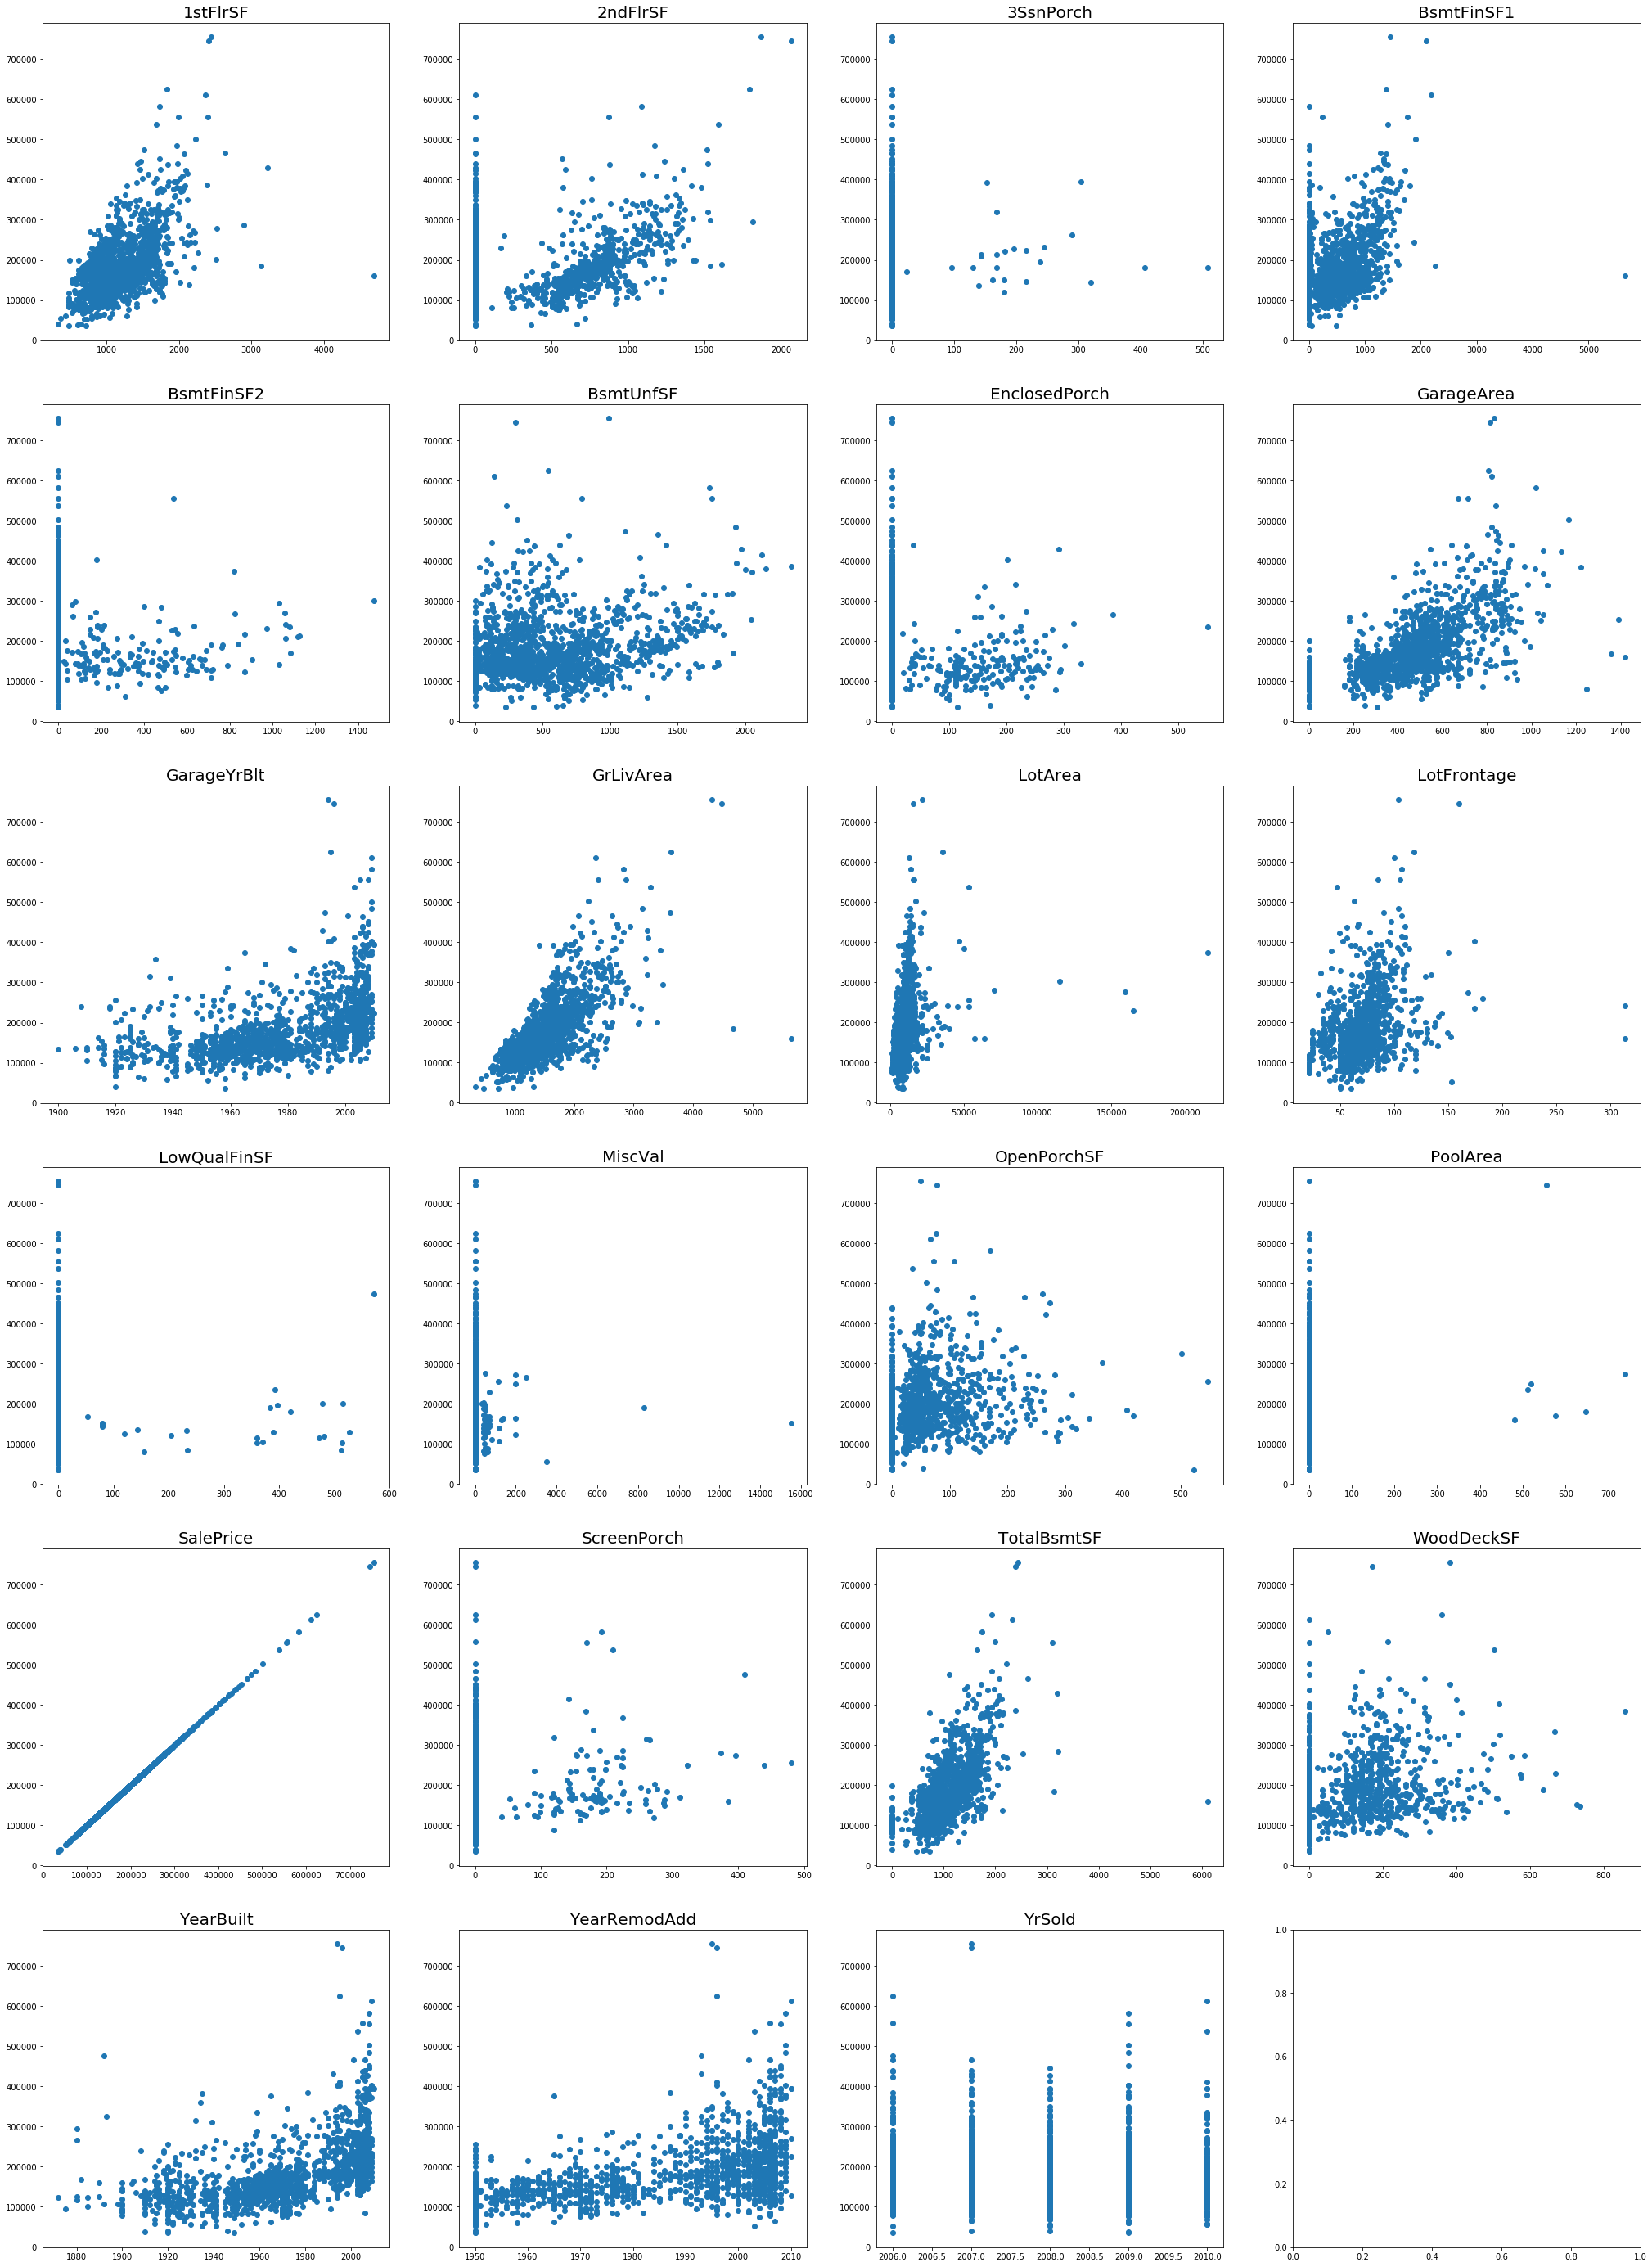

In [11]:
fig, ax = plt.subplots(a+1, 4, figsize=(35,50))

for i, feature in enumerate(num_features):
    if i < 4:
        ax[0, i].scatter(train_data[feature], train_data['SalePrice'])
        ax[0, i].set_title(feature, fontsize=20)
    if i < 8 and i >= 4:
        ax[1, i-4].scatter(train_data[feature], train_data['SalePrice'])
        ax[1, i-4].set_title(feature, fontsize=20)
    if i < 12 and i >= 8:
        ax[2, i-8].scatter(train_data[feature], train_data['SalePrice'])
        ax[2, i-8].set_title(feature, fontsize=20)
    if i < 16 and i >= 12:
        ax[3, i-12].scatter(train_data[feature], train_data['SalePrice'])
        ax[3, i-12].set_title(feature, fontsize=20)
    if i < 20 and i >= 16:
        ax[4, i-16].scatter(train_data[feature], train_data['SalePrice'])
        ax[4, i-16].set_title(feature, fontsize=20)
    if i < 24 and i >= 20:
        ax[5, i-20].scatter(train_data[feature], train_data['SalePrice'])
        ax[5, i-20].set_title(feature, fontsize=20)
;

In [12]:
corr_num = train_data[num_features].corr()['SalePrice'].sort_values()
corr_num

EnclosedPorch   -0.128578
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BsmtUnfSF        0.214479
LotArea          0.263843
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GrLivArea        0.708624
SalePrice        1.000000
Name: SalePrice, dtype: float64

#### Let's see the correlations more than 0.4 or less than -0.4 bettter

In [13]:
corr_num_imp = corr_num[abs(corr_num) > 0.4]
corr_num_imp = corr_num_imp[:-1]
corr_num_imp

GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GrLivArea       0.708624
Name: SalePrice, dtype: float64

#### Correlation with discreet variables

In [14]:
num_features_dis = [
 'MSSubClass'
, 'OverallQual'
, 'OverallCond'
, 'BsmtFullBath'
, 'BsmtHalfBath'
, 'FullBath'
, 'HalfBath'
, 'BedroomAbvGr'
, 'KitchenAbvGr'
, 'TotRmsAbvGrd'
, 'Fireplaces'
, 'GarageCars'
, 'MoSold'
]

In [15]:
len(num_features_dis)

13

In [16]:
import seaborn as sns

ValueError: Dimensions of labels and X must be compatible

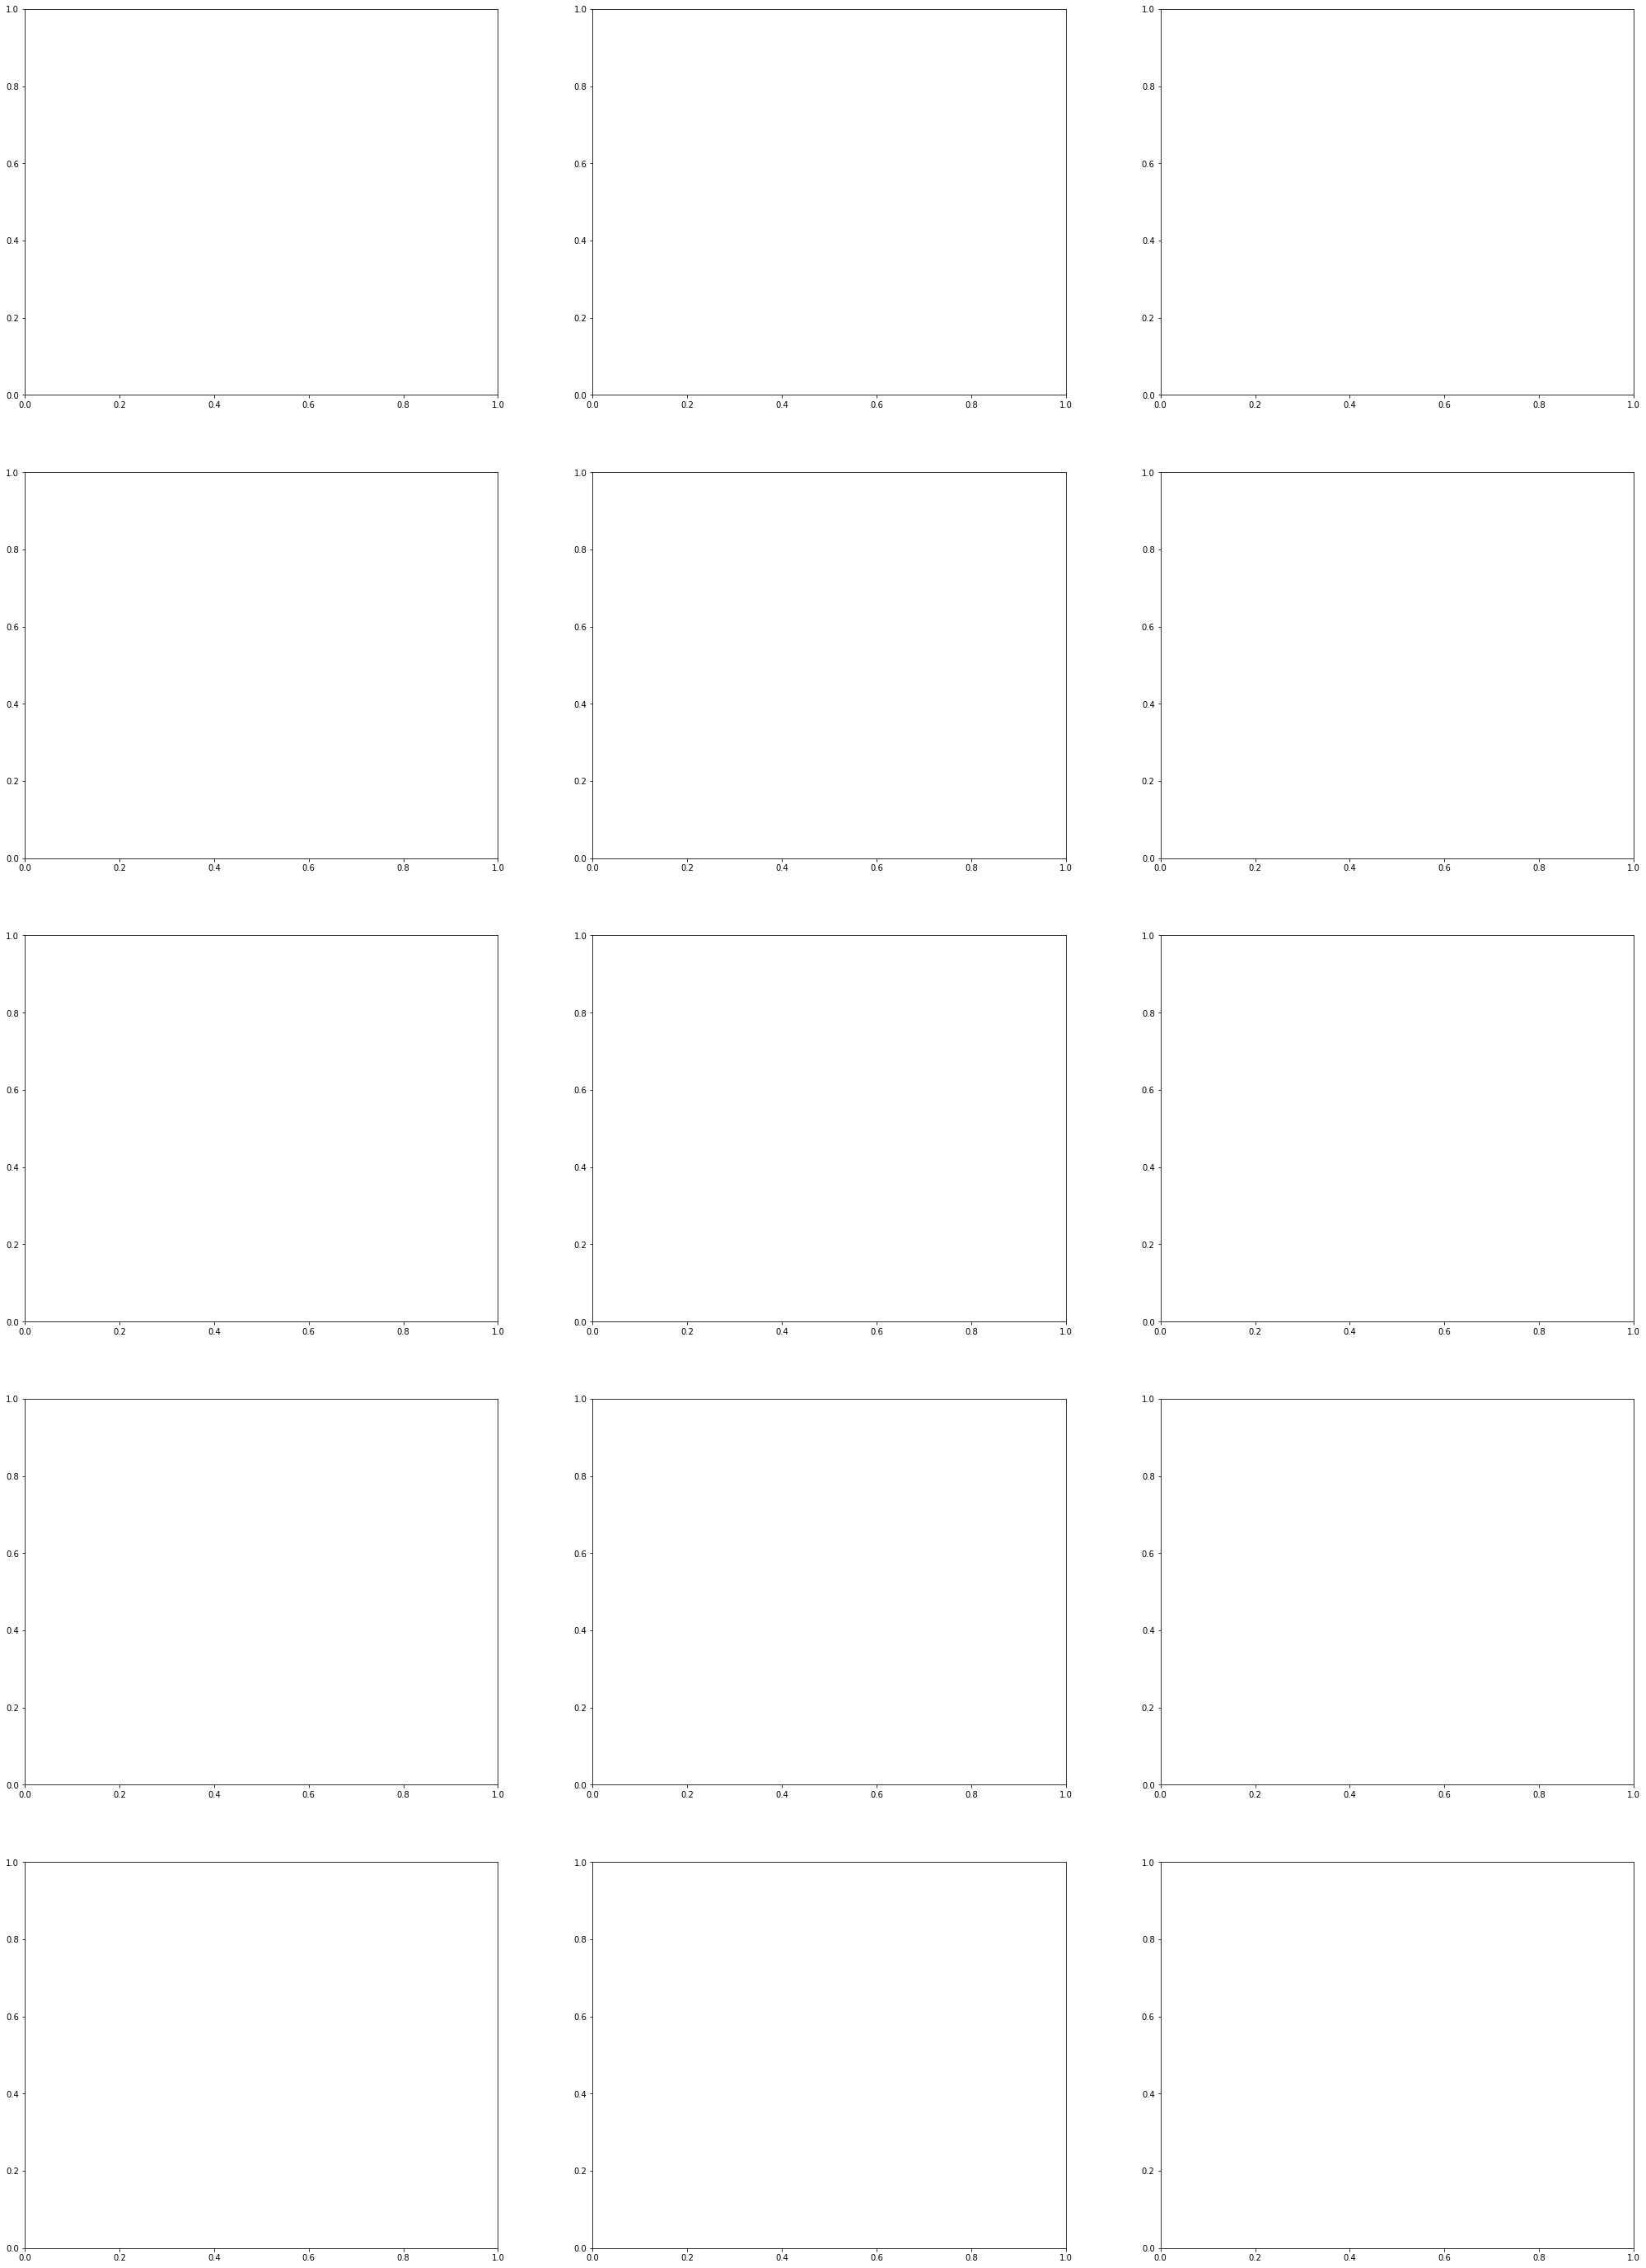

In [18]:
fig, ax = plt.subplots(5, 3, figsize=(35,50))

for i, feature in enumerate(num_features_dis):
    if i < 3:
        ax[0, i].boxplot(train_data['SalePrice'], vert=True, patch_artist=True, labels=train_data[feature])
        ax[0, i].set_title(feature, fontsize=20)
#     if i < 6 and i >= 3:
#         ax[1, i-3].sns.boxplot(x=feature, y="SalePrice", data=data)
#         ax[1, i-3].set_title(feature, fontsize=20)
#     if i < 9 and i >= 6:
#         ax[2, i-6].sns.boxplot(x=feature, y="SalePrice", data=data)
#         ax[2, i-6].set_title(feature, fontsize=20)
#     if i < 12 and i >= 9:
#         ax[3, i-9].sns.boxplot(x=feature, y="SalePrice", data=data)
#         ax[3, i-9].set_title(feature, fontsize=20)
#     if i < 15 and i >= 12:
#         ax[4, i-12].sns.boxplot(x=feature, y="SalePrice", data=data)
#         ax[4, i-12].set_title(feature, fontsize=20)
# ;

In [20]:
import numpy as np
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]